# Data manipulation of Shop Customer Data

In [158]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [159]:
url ="https://raw.githubusercontent.com/fabricio-inoue/Data-Manipulation/main/Customers.csv"

df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [160]:
df.info()

# 35 missing data from profession

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [161]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [162]:
df["Profession"] = df["Profession"].fillna(df["Profession"].mode()[0])

df.isnull().sum()

# fill missing data with mode

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [163]:
df.describe()

# Average age: 49
# Average annual income: $110731
# Average spending score: 51
# Average work experience: 4.1
# Average family size: 3.77

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [164]:
df.nunique()

CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

In [165]:
gender_count = df["Gender"].value_counts()

fig = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index, title="Distribution of gender", text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")

fig.show()

# ~1200 female, ~800 male. Majority of data is composed of females, data may have a bias towards the female gender.

In [166]:
fig = px.box(df, x="Gender", y="Annual Income ($)", color="Gender", title="Annual Income x Gender", width=1200, height=800)

fig.show()

# No significant difference between genders

In [167]:
fig = px.box(df, x="Profession", y="Annual Income ($)", color="Profession", title="Annual Income x Profession", width=1200, height=800)

fig.show()



In [168]:
profession_count = df["Profession"].value_counts()

fig = px.bar(y=profession_count, x=profession_count.index, color=profession_count.index, text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")
fig.update_layout(title="Distribution of professions")

fig.show()

# The largest group is Artist, second largest is Healthcare, third largest is Entertainment and smallest is Homemaker.

In [169]:
fig = px.histogram(df, x="Spending Score (1-100)", text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")

fig.show()

# Data is distributed relatively evenly. It has a peak in the middle between 45-49.

In [170]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [171]:
# Separating categorical to numerical columns

categorical_col = ["Gender", "Profession"]

numerical_col = ["CustomerID", "Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]

In [172]:
# Gives a unique value to each column in the categorical columns.

for cat_col in categorical_col:

    encoder = LabelEncoder()

    df[cat_col] = encoder.fit_transform(df[cat_col])

In [173]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [174]:
# Standarazing the dataset

scaler = StandardScaler()

# Remove the CostumerID
df.drop(columns=['CustomerID'], inplace=True)
full_data = scaler.fit_transform(df)

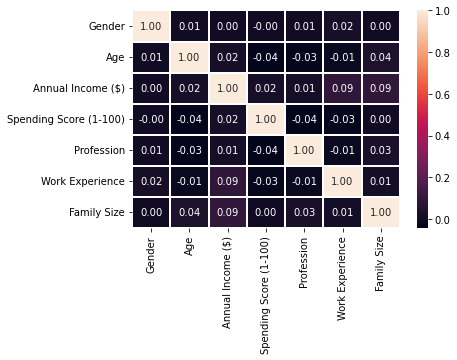

In [175]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()

# There is no strong corrrlation between features in data. Lack of correlation is uncommon when considering real world problems, indicating that there may be a problem with the dataset.